# Stock Price Prediction
# by Team XV
# Members: Megananthan.K [CSE18130], C.Sainath [CSE18146], J.Suresh [CSE18169]

## Initializations and Imports

### Pandas_Datareader is used to get data during runtime, than having to download datasets for each stock

In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime

In [3]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2021, 1, 1)
stock = "NFLX"

In [4]:
df=web.DataReader(stock, 'yahoo', start, end)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-17,535.489990,526.440002,529.000000,532.900024,3193400.0,532.900024
2020-12-18,536.369995,526.020020,533.200012,534.450012,4502700.0,534.450012
2020-12-21,532.619995,521.150024,530.049988,528.909973,3894000.0,528.909973
2020-12-22,530.400024,520.500000,527.690002,527.330017,1906600.0,527.330017
2020-12-23,526.320007,514.200012,524.760010,514.479980,2393200.0,514.479980
2020-12-24,519.349976,512.210022,515.119995,513.969971,1144000.0,513.969971
2020-12-28,523.659973,507.130005,516.429993,519.119995,2891900.0,519.119995
2020-12-29,536.549988,515.479980,519.900024,530.869995,4022400.0,530.869995
2020-12-30,533.260010,523.690002,530.130005,524.590027,1876300.0,524.590027


## Pre-Processing

In [5]:
df.reset_index(inplace=True)
df.sample(5)

,Date,High,Low,Open,Close,Volume,Adj Close
1027,2016-02-03,92.690002,86.139999,92.410004,90.739998,27466000.0,90.739998
1045,2016-03-01,99.160004,93.610001,94.580002,98.300003,17048800.0,98.300003
54,2012-03-21,17.270000,16.517143,16.571428,17.157143,47321400.0,17.157143
1621,2018-06-13,384.250000,364.109985,367.529999,379.929993,18222800.0,379.929993
1732,2018-11-19,285.089996,269.149994,283.790009,270.600006,12993800.0,270.600006


In [6]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2265.000000,2265.000000,2265.000000,2265.000000,2.265000e+03,2265.000000
mean,176.078337,170.491013,173.334291,173.414718,1.687126e+07,173.414718
std,151.484020,146.498113,149.048860,149.120321,1.750255e+07,149.120321
min,7.925714,7.544286,7.712857,7.685714,1.144000e+06,7.685714
25%,52.398571,50.505714,51.577145,51.367142,6.797000e+06,51.367142
50%,112.180000,107.680000,110.209999,110.129997,1.173690e+07,110.129997
75%,316.100006,304.260010,309.720001,310.480011,2.022300e+07,310.480011
max,575.369995,541.000000,567.979980,556.549988,2.140733e+08,556.549988


In [7]:
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

## Correlation

In [8]:
corr = df.corr(method='pearson')
corr

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999661,0.999741,0.999744,-0.441585,0.999744
Low,0.999661,1.000000,0.999734,0.999726,-0.447277,0.999726
Open,0.999741,0.999734,1.000000,0.999426,-0.444454,0.999426
Close,0.999744,0.999726,0.999426,1.000000,-0.444066,1.000000
Volume,-0.441585,-0.447277,-0.444454,-0.444066,1.000000,-0.444066
Adj Close,0.999744,0.999726,0.999426,1.000000,-0.444066,1.000000


<AxesSubplot:>

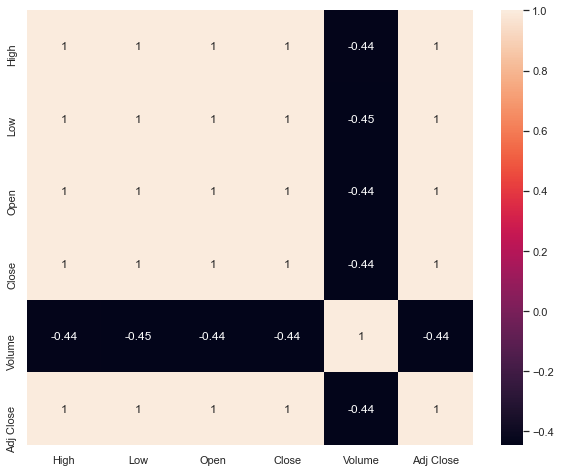

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr, annot=True)

In [10]:
data = df.drop(['Volume','Adj Close'],axis = 1)
data

,Date,High,Low,Open,Close
0,2012-01-03,10.388571,10.018571,10.040000,10.320000
1,2012-01-04,11.567143,10.258571,10.335714,11.492857
2,2012-01-05,11.694286,11.040000,11.345714,11.328571
3,2012-01-06,12.471429,11.242857,11.302857,12.327143
4,2012-01-09,14.235714,12.448571,12.801429,14.025714
...,...,...,...,...,...
2260,2020-12-24,519.349976,512.210022,515.119995,513.969971
2261,2020-12-28,523.659973,507.130005,516.429993,519.119995
2262,2020-12-29,536.549988,515.479980,519.900024,530.869995
2263,2020-12-30,533.260010,523.690002,530.130005,524.590027


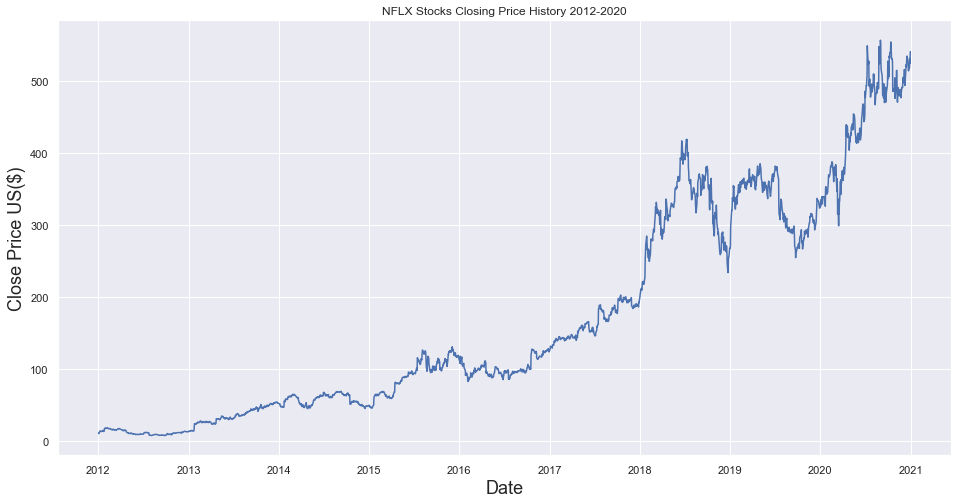

In [11]:
plt.figure(figsize=(16,8))
plt.title(stock+' Stocks Closing Price History 2012-2020')
plt.plot(data['Date'],data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
plt.style.use('fivethirtyeight')
plt.show()

In [12]:
x_df = pd.DataFrame(data.iloc[:,:4])
y_df = pd.DataFrame(data.iloc[:,-1:])
x_df

,Date,High,Low,Open
0,2012-01-03,10.388571,10.018571,10.040000
1,2012-01-04,11.567143,10.258571,10.335714
2,2012-01-05,11.694286,11.040000,11.345714
3,2012-01-06,12.471429,11.242857,11.302857
4,2012-01-09,14.235714,12.448571,12.801429
...,...,...,...,...
2260,2020-12-24,519.349976,512.210022,515.119995
2261,2020-12-28,523.659973,507.130005,516.429993
2262,2020-12-29,536.549988,515.479980,519.900024
2263,2020-12-30,533.260010,523.690002,530.130005


In [13]:
x_df['Year']=data['Date'].dt.year
x_df['Month']=data['Date'].dt.month
x_df['Day']=data['Date'].dt.day
x_df


,Date,High,Low,Open,Year,Month,Day
0,2012-01-03,10.388571,10.018571,10.040000,2012,1,3
1,2012-01-04,11.567143,10.258571,10.335714,2012,1,4
2,2012-01-05,11.694286,11.040000,11.345714,2012,1,5
3,2012-01-06,12.471429,11.242857,11.302857,2012,1,6
4,2012-01-09,14.235714,12.448571,12.801429,2012,1,9
...,...,...,...,...,...,...,...
2260,2020-12-24,519.349976,512.210022,515.119995,2020,12,24
2261,2020-12-28,523.659973,507.130005,516.429993,2020,12,28
2262,2020-12-29,536.549988,515.479980,519.900024,2020,12,29
2263,2020-12-30,533.260010,523.690002,530.130005,2020,12,30


In [14]:
x_df=x_df[['Day','Month','Year','High','Open','Low']]
x_df

,Day,Month,Year,High,Open,Low
0,3,1,2012,10.388571,10.040000,10.018571
1,4,1,2012,11.567143,10.335714,10.258571
2,5,1,2012,11.694286,11.345714,11.040000
3,6,1,2012,12.471429,11.302857,11.242857
4,9,1,2012,14.235714,12.801429,12.448571
...,...,...,...,...,...,...
2260,24,12,2020,519.349976,515.119995,512.210022
2261,28,12,2020,523.659973,516.429993,507.130005
2262,29,12,2020,536.549988,519.900024,515.479980
2263,30,12,2020,533.260010,530.130005,523.690002


## Splitting data into training and test data

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_df,y_df,test_size=0.2,shuffle=False)
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape )
x_train,x_test

(1812, 6) (453, 6) (1812, 1) (453, 1)


(      Day  Month  Year        High        Open         Low
 0       3      1  2012   10.388571   10.040000   10.018571
 1       4      1  2012   11.567143   10.335714   10.258571
 2       5      1  2012   11.694286   11.345714   11.040000
 3       6      1  2012   12.471429   11.302857   11.242857
 4       9      1  2012   14.235714   12.801429   12.448571
 ...   ...    ...   ...         ...         ...         ...
 1807   12      3  2019  360.130005  359.369995  353.799988
 1808   13      3  2019  362.480011  355.809998  352.769989
 1809   14      3  2019  363.839996  360.500000  358.100006
 1810   15      3  2019  364.000000  361.019989  358.890015
 1811   18      3  2019  370.970001  362.470001  361.859985
 
 [1812 rows x 6 columns],
       Day  Month  Year        High        Open         Low
 1812   19      3  2019  366.959991  366.399994  356.799988
 1813   20      3  2019  375.899994  358.910004  357.010010
 1814   21      3  2019  379.000000  374.000000  370.609985
 1815   22  

## Creating Linear Regression model and training it

In [16]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [17]:
y_predict=regr.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE:',mean_squared_error(y_test,y_predict))
print('R2:',r2_score(y_test, y_predict))

MSE: 16.98299673645839
R2: 0.9974391078607151


In [19]:
y_pred = pd.DataFrame(y_predict, columns =['Close'])
y_pred

,Close
0,359.224433
1,372.078499
2,375.563884
3,363.694377
4,364.629259
...,...
448,516.134631
449,514.973849
450,530.467166
451,527.348751


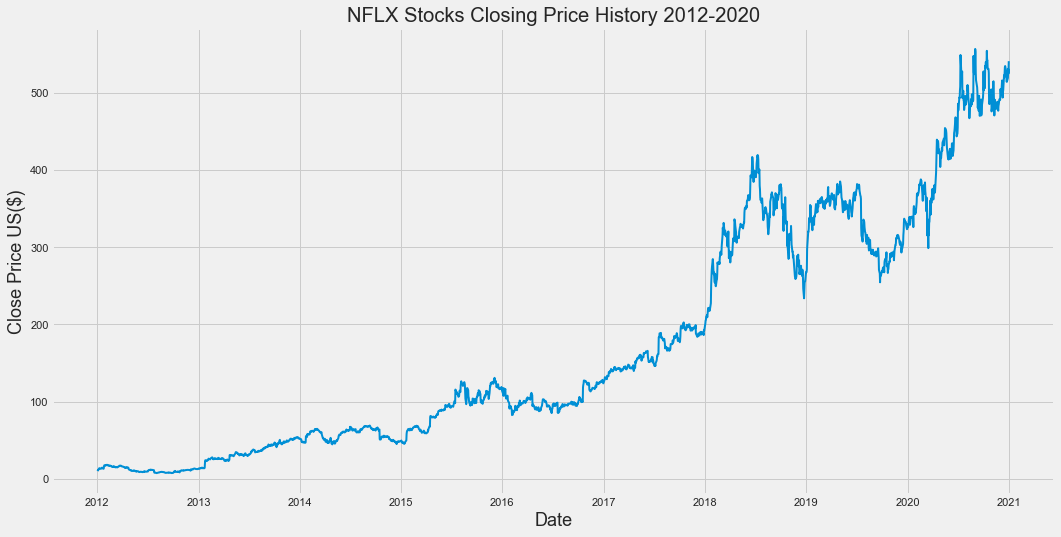

In [20]:
plt.figure(figsize=(16,8))
plt.title(stock+' Stocks Closing Price History 2012-2020')
plt.plot(data['Date'],data['Close'],linewidth=2)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
plt.style.use('fivethirtyeight')
plt.show()

## Processing predicted output and putting it in representable form

In [21]:
x_train['Date']=pd.to_datetime(x_train[['Year', 'Month', 'Day']])
x_train=x_train[['Date','High','Open','Low']]
x_train

<ipython-input-21-c0b6e27e500d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Date']=pd.to_datetime(x_train[['Year', 'Month', 'Day']])


,Date,High,Open,Low
0,2012-01-03,10.388571,10.040000,10.018571
1,2012-01-04,11.567143,10.335714,10.258571
2,2012-01-05,11.694286,11.345714,11.040000
3,2012-01-06,12.471429,11.302857,11.242857
4,2012-01-09,14.235714,12.801429,12.448571
...,...,...,...,...
1807,2019-03-12,360.130005,359.369995,353.799988
1808,2019-03-13,362.480011,355.809998,352.769989
1809,2019-03-14,363.839996,360.500000,358.100006
1810,2019-03-15,364.000000,361.019989,358.890015


In [22]:
temp = [x_train['Date'],y_train['Close']]
headers = ['Date','Close']
df2= pd.concat(temp, axis=1, keys=headers)
df2 = pd.DataFrame(df2)
df2

,Date,Close
0,2012-01-03,10.320000
1,2012-01-04,11.492857
2,2012-01-05,11.328571
3,2012-01-06,12.327143
4,2012-01-09,14.025714
...,...,...
1807,2019-03-12,356.269989
1808,2019-03-13,361.209991
1809,2019-03-14,358.820007
1810,2019-03-15,361.459991


In [23]:
x_test['Date']=pd.to_datetime(x_test[['Year', 'Month', 'Day']])
x_test=x_test[['Date','High','Open','Low']]
x_test

<ipython-input-23-914583ad64ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Date']=pd.to_datetime(x_test[['Year', 'Month', 'Day']])


,Date,High,Open,Low
1812,2019-03-19,366.959991,366.399994,356.799988
1813,2019-03-20,375.899994,358.910004,357.010010
1814,2019-03-21,379.000000,374.000000,370.609985
1815,2019-03-22,376.429993,375.950012,360.040009
1816,2019-03-25,367.040009,359.000000,357.440002
...,...,...,...,...
2260,2020-12-24,519.349976,515.119995,512.210022
2261,2020-12-28,523.659973,516.429993,507.130005
2262,2020-12-29,536.549988,519.900024,515.479980
2263,2020-12-30,533.260010,530.130005,523.690002


In [24]:
x_test.reset_index(drop=True, inplace=True)
y_pred.reset_index(drop=True, inplace=True)
df3 = pd.concat( [x_test['Date'], y_pred], axis=1)
df3 = pd.DataFrame(df3)
df3

,Date,Close
0,2019-03-19,359.224433
1,2019-03-20,372.078499
2,2019-03-21,375.563884
3,2019-03-22,363.694377
4,2019-03-25,364.629259
...,...,...
448,2020-12-24,516.134631
449,2020-12-28,514.973849
450,2020-12-29,530.467166
451,2020-12-30,527.348751


In [25]:
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
df4 = pd.concat( [x_test['Date'], y_test['Close']], axis=1)
df4 = pd.DataFrame(df4)
df4.sort_values('Date', inplace=True, ascending=False)
df4

,Date,Close
452,2020-12-31,540.729980
451,2020-12-30,524.590027
450,2020-12-29,530.869995
449,2020-12-28,519.119995
448,2020-12-24,513.969971
...,...,...
4,2019-03-25,366.230011
3,2019-03-22,361.010010
2,2019-03-21,377.869995
1,2019-03-20,375.220001


In [26]:
df2.sort_values('Date', inplace=True, ascending=False)
df2

,Date,Close
1811,2019-03-18,363.440002
1810,2019-03-15,361.459991
1809,2019-03-14,358.820007
1808,2019-03-13,361.209991
1807,2019-03-12,356.269989
...,...,...
4,2012-01-09,14.025714
3,2012-01-06,12.327143
2,2012-01-05,11.328571
1,2012-01-04,11.492857


In [27]:
df3.sort_values('Date', inplace=True, ascending=False)
df3

,Date,Close
452,2020-12-31,540.572653
451,2020-12-30,527.348751
450,2020-12-29,530.467166
449,2020-12-28,514.973849
448,2020-12-24,516.134631
...,...,...
4,2019-03-25,364.629259
3,2019-03-22,363.694377
2,2019-03-21,375.563884
1,2019-03-20,372.078499


## Graphical representation of Total Dataset's Stock Closing Price vs Predicted Price

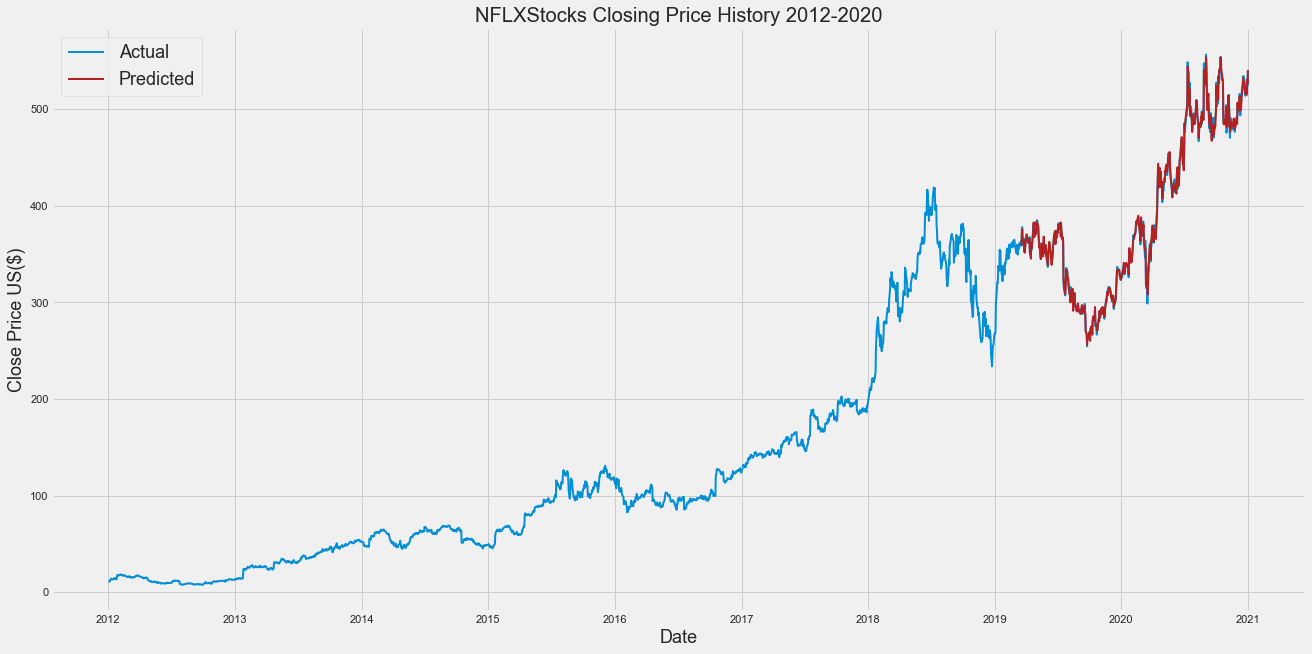

In [28]:
plt.figure(figsize=(20,10))
plt.title(stock+'Stocks Closing Price History 2012-2020')

plt.plot(data['Date'],data['Close'],label = 'Actual',linewidth=2)
plt.plot(df3['Date'],df3['Close'],label='Predicted',linewidth=2,color='firebrick')

plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
plt.style.use('fivethirtyeight')
plt.legend(loc="upper left",fontsize=18)
plt.show()

## Graphical representation of Test Dataset's Stock Closing Price vs Predicted Closing Price

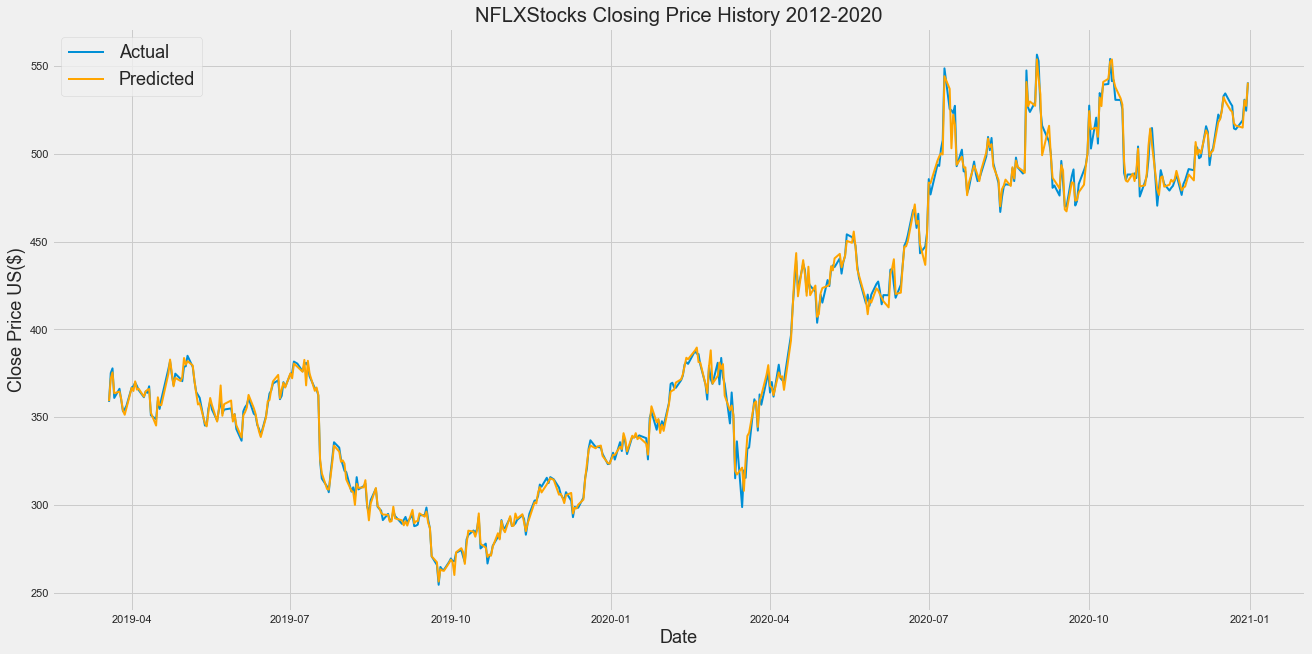

In [29]:
plt.figure(figsize=(20,10))
plt.title(stock +'Stocks Closing Price History 2012-2020')

plt.plot(df4['Date'],df4['Close'],label='Actual',linewidth=2)
plt.plot(df3['Date'],df3['Close'],label='Predicted',linewidth=2,color = 'orange')

plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
plt.style.use('fivethirtyeight')
plt.legend(loc="upper left",fontsize=18)
plt.show()

In [30]:
y_test = pd.DataFrame(y_test, columns =['Close'])
y_test.reset_index(inplace=True)
y_test.drop(['index'],axis=1,inplace = True)

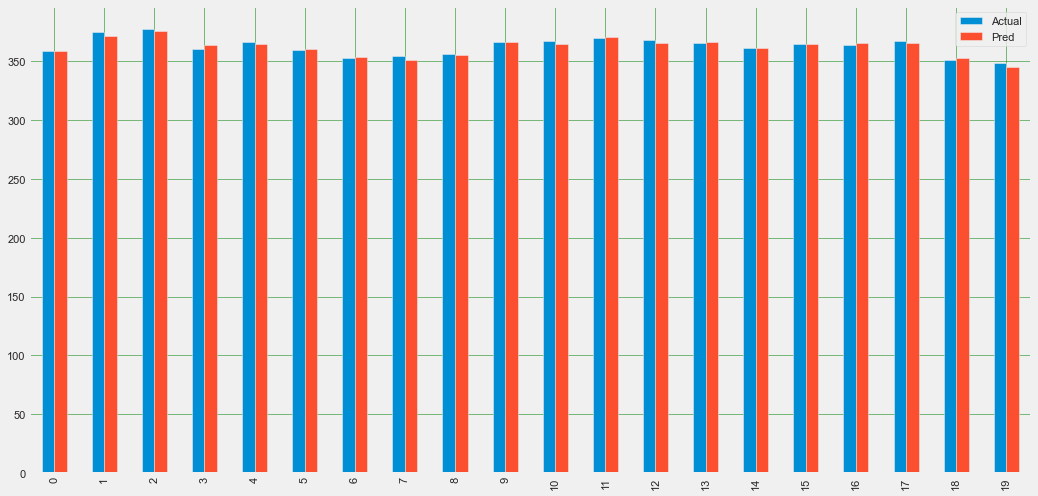

In [31]:
plot_df=pd.DataFrame({'Actual':y_test['Close'],'Pred':y_pred['Close']})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# To compare performance of Linear Regression, we create model using Neural Network of LSTM (Long Short-Term Memory) Neurons

# LSTM Neural Network Model

In [32]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

In [33]:
data = df.copy()
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,10.388571,10.018571,10.040000,10.320000,29213800.0,10.320000
1,2012-01-04,11.567143,10.258571,10.335714,11.492857,100489900.0,11.492857
2,2012-01-05,11.694286,11.040000,11.345714,11.328571,86552900.0,11.328571
3,2012-01-06,12.471429,11.242857,11.302857,12.327143,125610800.0,12.327143
4,2012-01-09,14.235714,12.448571,12.801429,14.025714,214073300.0,14.025714
...,...,...,...,...,...,...,...
2260,2020-12-24,519.349976,512.210022,515.119995,513.969971,1144000.0,513.969971
2261,2020-12-28,523.659973,507.130005,516.429993,519.119995,2891900.0,519.119995
2262,2020-12-29,536.549988,515.479980,519.900024,530.869995,4022400.0,530.869995
2263,2020-12-30,533.260010,523.690002,530.130005,524.590027,1876300.0,524.590027


In [34]:
data["Date"]=pd.to_datetime(data.Date,format="%Y-%m-%d")
data.index=df['Date']
data.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

## Graphical representation of Stock Price History

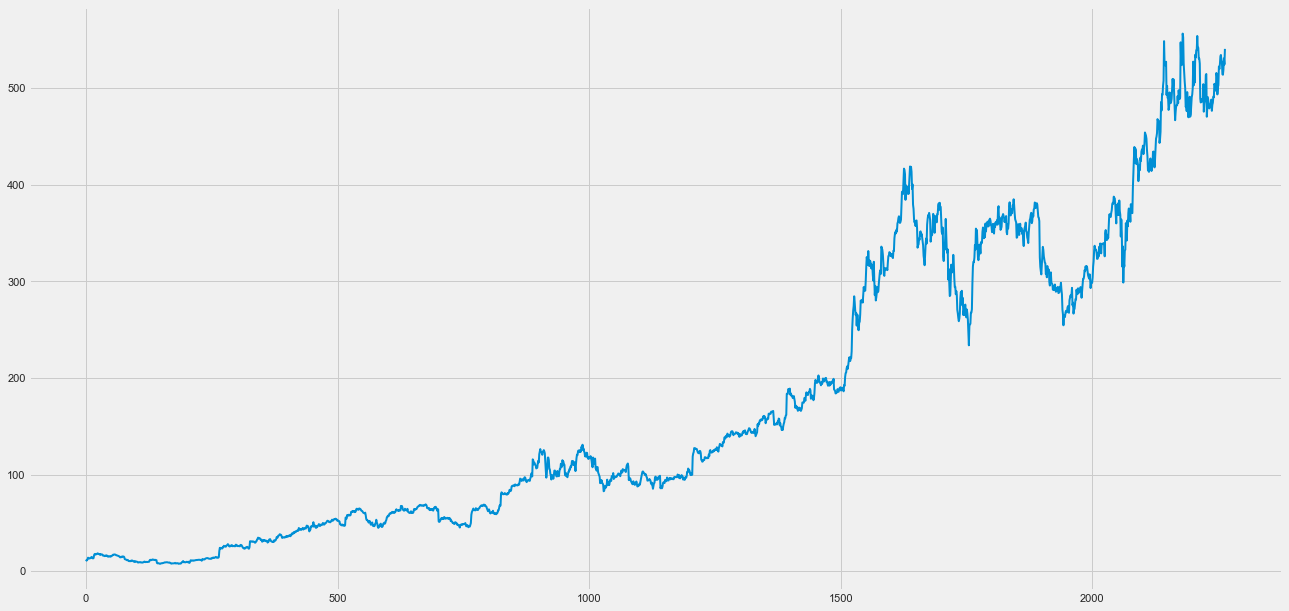

In [35]:
plt.plot(df["Close"],label='Close Price history',linewidth=2)

## Pre-Processing Data

In [36]:
data.sort_index(ascending=True,axis=0,inplace = True)
data

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2012-01-03,2012-01-03,10.388571,10.018571,10.040000,10.320000,29213800.0,10.320000
2012-01-04,2012-01-04,11.567143,10.258571,10.335714,11.492857,100489900.0,11.492857
2012-01-05,2012-01-05,11.694286,11.040000,11.345714,11.328571,86552900.0,11.328571
2012-01-06,2012-01-06,12.471429,11.242857,11.302857,12.327143,125610800.0,12.327143
2012-01-09,2012-01-09,14.235714,12.448571,12.801429,14.025714,214073300.0,14.025714
...,...,...,...,...,...,...,...
2020-12-24,2020-12-24,519.349976,512.210022,515.119995,513.969971,1144000.0,513.969971
2020-12-28,2020-12-28,523.659973,507.130005,516.429993,519.119995,2891900.0,519.119995
2020-12-29,2020-12-29,536.549988,515.479980,519.900024,530.869995,4022400.0,530.869995


In [37]:
df1 = data[['Date','Close']].copy()
df1.drop("Date",axis=1,inplace=True)
df1

,Close
Date,
2012-01-03,10.320000
2012-01-04,11.492857
2012-01-05,11.328571
2012-01-06,12.327143
2012-01-09,14.025714
...,...
2020-12-24,513.969971
2020-12-28,519.119995
2020-12-29,530.869995


In [38]:
data = df1.values
rows = len(data)

In [39]:
train_data=data[0:int(rows*0.8),:]
valid_data=data[int(rows*0.8):,:]

In [40]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)

# Splitting data into training data and valid testing data

In [41]:
x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [42]:
x_train_data,len(y_train_data)

([array([0.00479952, 0.0069364 , 0.00663708, 0.00845642, 0.01155113,
         0.01093947, 0.00998165, 0.00998165, 0.01056207, 0.01065057,
         0.01164483, 0.01292539, 0.0120873 , 0.01045275, 0.010117  ,
         0.01073385, 0.01619188, 0.01821684, 0.01864369, 0.01728244,
         0.01800341, 0.0182715 , 0.01890397, 0.01963796, 0.01928138,
         0.0182715 , 0.01849013, 0.01825328, 0.01678791, 0.01802944,
         0.01776656, 0.01772752, 0.0177119 , 0.01655366, 0.01525227,
         0.01540584, 0.01506227, 0.01447405, 0.01549173, 0.01481761,
         0.01534337, 0.01595503, 0.01483843, 0.01388061, 0.01337567,
         0.01412527, 0.01440117, 0.01363855, 0.01367759, 0.01339129,
         0.01467186, 0.0146172 , 0.01575461, 0.0159342 , 0.01725641,
         0.01689984, 0.01727984, 0.01774834, 0.01740477, 0.01692065]),
  array([0.0069364 , 0.00663708, 0.00845642, 0.01155113, 0.01093947,
         0.00998165, 0.00998165, 0.01056207, 0.01065057, 0.01164483,
         0.01292539, 0.0120873 ,

In [43]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data.shape[0],x_train_data.shape[1]

(1752, 60)

In [44]:
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))
x_train_data.shape[0],x_train_data.shape[1],x_train_data.shape[2]

(1752, 60, 1)

## Building Neural Network

In [45]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

## Training NN Model

In [46]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=15,batch_size=1,verbose=2)

Epoch 1/15
1752/1752 - 35s - loss: 9.0956e-04
Epoch 2/15
1752/1752 - 35s - loss: 4.0649e-04
Epoch 3/15
1752/1752 - 32s - loss: 2.3807e-04
Epoch 4/15
1752/1752 - 31s - loss: 2.0780e-04
Epoch 5/15
1752/1752 - 35s - loss: 2.1214e-04
Epoch 6/15
1752/1752 - 38s - loss: 1.7619e-04
Epoch 7/15
1752/1752 - 44s - loss: 1.4499e-04
Epoch 8/15
1752/1752 - 46s - loss: 1.8333e-04
Epoch 9/15
1752/1752 - 47s - loss: 1.6207e-04
Epoch 10/15
1752/1752 - 36s - loss: 1.4179e-04
Epoch 11/15
1752/1752 - 41s - loss: 1.3102e-04
Epoch 12/15
1752/1752 - 28s - loss: 1.3876e-04
Epoch 13/15
1752/1752 - 29s - loss: 1.2985e-04
Epoch 14/15
1752/1752 - 33s - loss: 1.2930e-04
Epoch 15/15
1752/1752 - 32s - loss: 1.2451e-04


In [47]:
inputs_data=df1[len(df1)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [48]:
x_test=[]
for i in range(60,inputs_data.shape[0]):
    x_test.append(inputs_data[i-60:i,0])
x_test=np.array(x_test)

In [49]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
y_pred=lstm_model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred)

In [50]:
lstm_model.save("saved_lstm_model.h5")

## Graphical Representation of Actual Closing Price value from total dataset vs Predicted Closing Price

<ipython-input-54-9f9fa128e2ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=y_pred.copy()


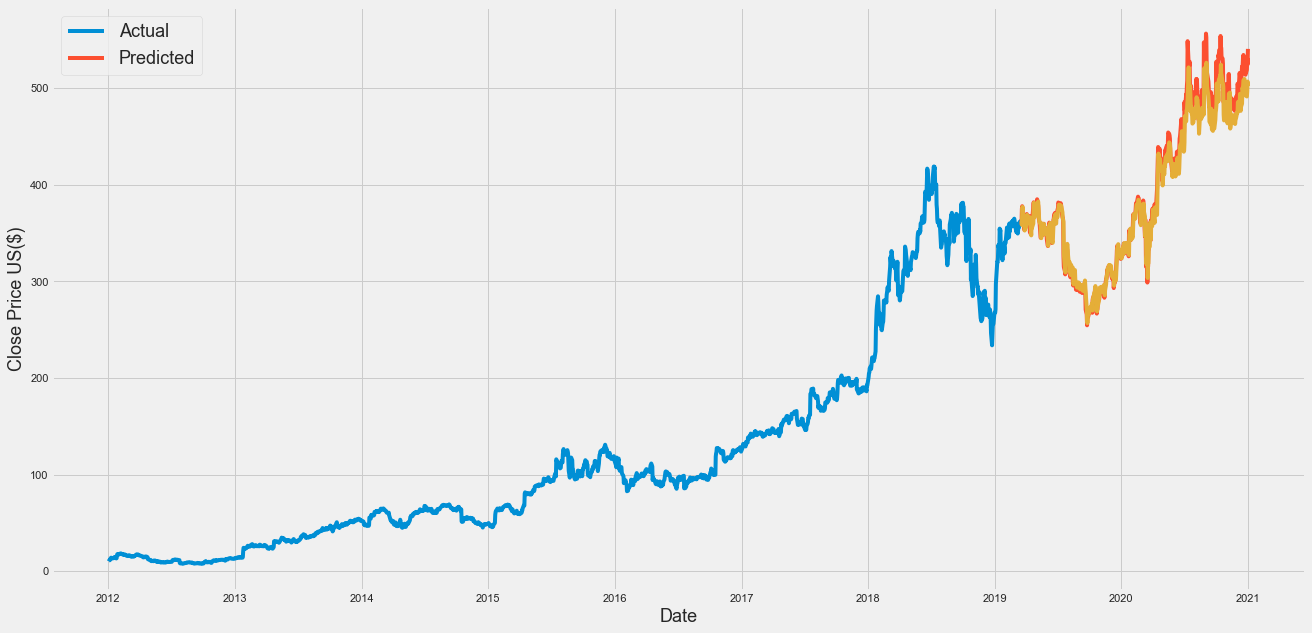

In [54]:
train_data=df1[:int(rows*0.8)]
valid_data=df1[int(rows*0.8):]
valid_data['Predictions']=y_pred.copy()
plt.plot(train_data[['Close']])
plt.plot(valid_data[['Close',"Predictions"]])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
plt.style.use('fivethirtyeight')
plt.legend(['Actual','Predicted'],loc="upper left",fontsize=18)
plt.show()

## Graphical Representation of Actual Testing Price value vs Predicted Closing Price values

<ipython-input-55-8f56e1ac2896>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=y_pred.copy()


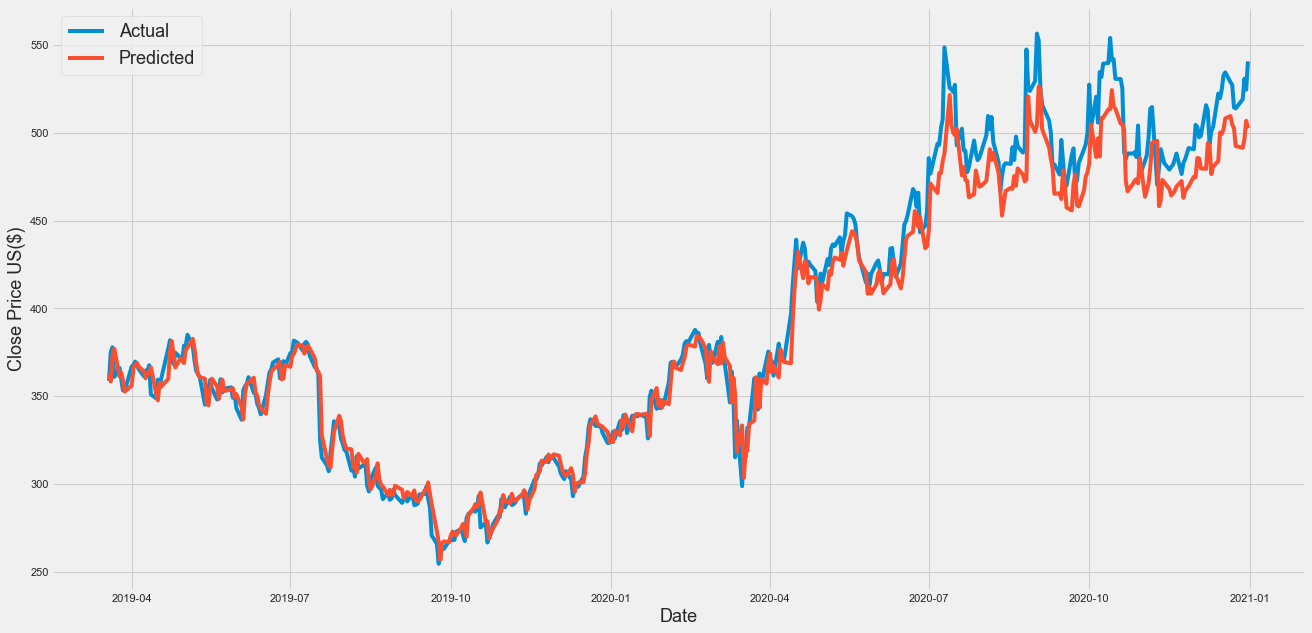

In [55]:
train_data=df1[:int(rows*0.8)]
valid_data=df1[int(rows*0.8):]
valid_data['Predictions']=y_pred.copy()

plt.plot(valid_data[['Close',"Predictions"]])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
plt.style.use('fivethirtyeight')
plt.legend(['Actual','Predicted'],loc="upper left",fontsize=18)
plt.show()

## As we can see from the two models, although the Linear Regression model seems to come close, it cannot be relied on as it's deviations from the actual values are erratic and un-predictable. Whereas when we see the LSTM model, we can see that it is accurate for the most part and is very similar in shape to the actual graph, but is just a slight lower in magnitude and this can be rectified further. Therefore, we have concluded from our case study that the Linear Regression model works, but the Neural Network is better for such time-sequence data.